In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_10x_Tongue

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P4_0_AAACCTGAGATTACCC,basal cell of epidermis,CL:0002187,basal cell of epidermis,2.0,Quake_10x_Tongue,3-M-8,proliferating,M,Tongue,Mus musculus,10X_P4_0,10x,
10X_P4_0_AAACCTGAGTGCCAGA,keratinocyte,CL:0000312,keratinocyte,1.0,Quake_10x_Tongue,3-M-8,differentiated,M,Tongue,Mus musculus,10X_P4_0,10x,
10X_P4_0_AAACCTGCAAATCCGT,keratinocyte,CL:0000312,keratinocyte,4.0,Quake_10x_Tongue,3-M-8,suprabasal_differentiating,M,Tongue,Mus musculus,10X_P4_0,10x,
10X_P4_0_AAACCTGGTAATCGTC,basal cell of epidermis,CL:0002187,basal cell of epidermis,0.0,Quake_10x_Tongue,3-M-8,basal_cells,M,Tongue,Mus musculus,10X_P4_0,10x,
10X_P4_0_AAACCTGGTCCAACTA,basal cell of epidermis,CL:0002187,basal cell of epidermis,2.0,Quake_10x_Tongue,3-M-8,proliferating,M,Tongue,Mus musculus,10X_P4_0,10x,


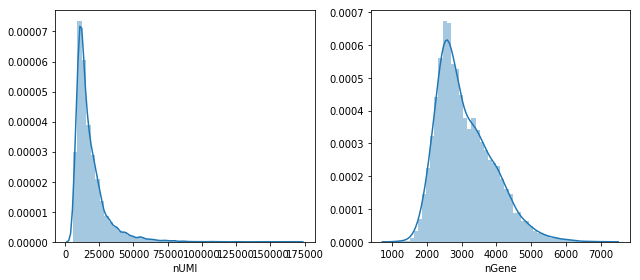

In [2]:
quake_10x_tongue = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Tongue/data.h5")
utils.peek(quake_10x_tongue, "Quake_10x_Tongue")
quake_10x_tongue = quake_10x_tongue.normalize()
quake_10x_tongue.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_tongue_model = cb.directi.fit_DIRECTi(
    quake_10x_tongue, quake_10x_tongue.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Tongue/model_0"
)
quake_10x_tongue.latent = quake_10x_tongue_model.inference(quake_10x_tongue)

[DIRECTi epoch 0] train=2.688, val=2.694, time elapsed=1.6s Regular save...
[DIRECTi epoch 1] train=2.665, val=2.649, time elapsed=0.7s
[DIRECTi epoch 2] train=2.334, val=1.377, time elapsed=0.7s
[DIRECTi epoch 3] train=1.290, val=1.791, time elapsed=0.7s
[DIRECTi epoch 4] train=1.267, val=1.848, time elapsed=0.7s
[DIRECTi epoch 5] train=1.254, val=1.877, time elapsed=0.7s
[DIRECTi epoch 6] train=1.171, val=1.479, time elapsed=0.7s
[DIRECTi epoch 7] train=1.148, val=1.373, time elapsed=0.7s
[DIRECTi epoch 8] train=1.136, val=1.311, time elapsed=0.7s
[DIRECTi epoch 9] train=1.128, val=1.329, time elapsed=0.7s
[DIRECTi epoch 10] train=1.123, val=1.214, time elapsed=0.7s Regular save...
[DIRECTi epoch 11] train=1.120, val=1.196, time elapsed=0.7s
[DIRECTi epoch 12] train=1.113, val=1.141, time elapsed=0.7s
[DIRECTi epoch 13] train=1.109, val=1.132, time elapsed=0.7s
[DIRECTi epoch 14] train=1.097, val=1.116, time elapsed=0.7s
[DIRECTi epoch 15] train=1.086, val=1.125, time elapsed=0.7s
[D

[  Info   ] Computing tSNE...


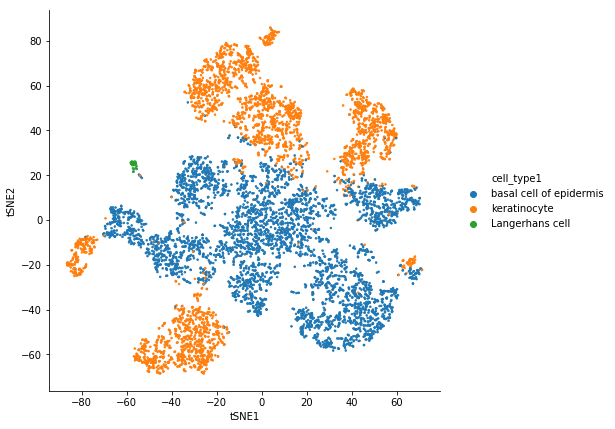

In [4]:
plot = quake_10x_tongue.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Tongue/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


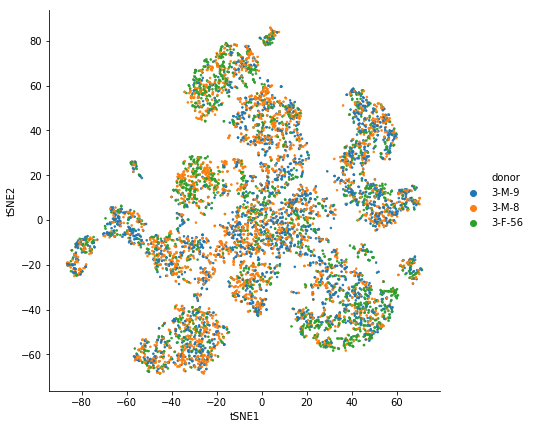

In [5]:
plot = quake_10x_tongue.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Tongue/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


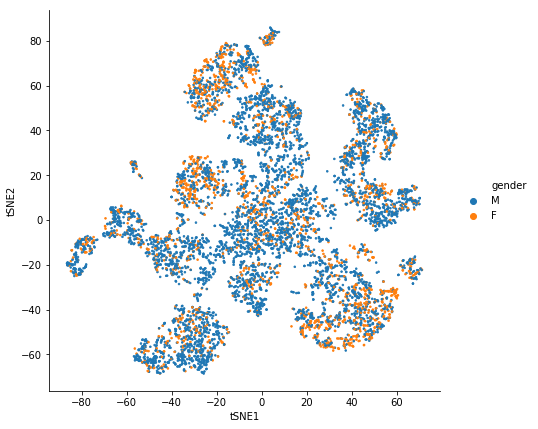

In [6]:
plot = quake_10x_tongue.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Tongue/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_10x_tongue_models = [quake_10x_tongue_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_tongue_models.append(cb.directi.fit_DIRECTi(
        quake_10x_tongue, quake_10x_tongue.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Tongue/model_%d" % i
    ))
quake_10x_tongue_blast = cb.blast.BLAST(quake_10x_tongue_models, quake_10x_tongue, 
                                               keep_exprs=True).build_empirical()
quake_10x_tongue_blast.save("Quake_10x_Tongue")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Tongue/model_1/checkpoint-143
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Tongue/model_2/checkpoint-146
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Tongue/model_3/checkpoint-135


In [8]:
with open("Quake_10x_Tongue/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Tongue/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_10x_tongue_blast, "Quake_10x_Tongue")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9932
Accuracy = 0.9844


## Mouse aligned

In [10]:
if not os.path.exists("ALIGNED_Mus_musculus_Tongue"):
    os.makedirs("ALIGNED_Mus_musculus_Tongue")
quake_smart_seq2_tongue = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Tongue/data.h5").normalize()
#quake_smart_seq2_tongue.obs["quake_smart_seq2_tongue_donor"] = \
#    quake_smart_seq2_tongue.obs["donor"]
#quake_10x_tongue.obs["quake_10x_tongue_donor"] = \
#    quake_10x_tongue.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_tongue=quake_10x_tongue,
    quake_smart_seq2_tongue=quake_smart_seq2_tongue
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [11]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,latent_7,latent_8,latent_9,organ,organism,plate,platform,region,tSNE1,tSNE2
10X_P4_0_AAACCTGAGATTACCC,basal cell of epidermis,CL:0002187,basal cell of epidermis,NaN,2.0,Quake_10x_Tongue,3-M-8,proliferating,M,1.952227,...,-0.432110,-2.217105,-0.054573,Tongue,Mus musculus,10X_P4_0,10x,,24.643885,-50.778011
10X_P4_0_AAACCTGAGTGCCAGA,keratinocyte,CL:0000312,keratinocyte,NaN,1.0,Quake_10x_Tongue,3-M-8,differentiated,M,-0.143614,...,0.382203,1.077314,1.535817,Tongue,Mus musculus,10X_P4_0,10x,,15.046158,48.147606
10X_P4_0_AAACCTGCAAATCCGT,keratinocyte,CL:0000312,keratinocyte,NaN,4.0,Quake_10x_Tongue,3-M-8,suprabasal_differentiating,M,0.339759,...,-2.644629,-0.118205,0.966125,Tongue,Mus musculus,10X_P4_0,10x,,-48.594257,-65.811966
10X_P4_0_AAACCTGGTAATCGTC,basal cell of epidermis,CL:0002187,basal cell of epidermis,NaN,0.0,Quake_10x_Tongue,3-M-8,basal_cells,M,0.537734,...,-0.090266,1.679216,-1.170952,Tongue,Mus musculus,10X_P4_0,10x,,-3.053765,-25.660566
10X_P4_0_AAACCTGGTCCAACTA,basal cell of epidermis,CL:0002187,basal cell of epidermis,NaN,2.0,Quake_10x_Tongue,3-M-8,proliferating,M,0.618954,...,0.950081,-1.060387,-0.548446,Tongue,Mus musculus,10X_P4_0,10x,,43.724243,-42.319500


In [12]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Tongue/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.385, val=2.415, time elapsed=1.8s Regular save...
[DIRECTi epoch 1] train=2.352, val=2.341, time elapsed=1.0s
[DIRECTi epoch 2] train=1.589, val=1.137, time elapsed=1.0s
[DIRECTi epoch 3] train=1.082, val=1.181, time elapsed=1.0s
[DIRECTi epoch 4] train=1.071, val=1.208, time elapsed=1.0s
[DIRECTi epoch 5] train=1.028, val=1.038, time elapsed=1.0s
[DIRECTi epoch 6] train=0.974, val=1.022, time elapsed=1.0s
[DIRECTi epoch 7] train=0.961, val=0.983, time elapsed=1.0s
[DIRECTi epoch 8] train=0.952, val=0.970, time elapsed=0.9s
[DIRECTi epoch 9] train=0.945, val=0.957, time elapsed=1.0s
[DIRECTi epoch 10] train=0.939, val=0.954, time elapsed=1.0s Regular save...
[DIRECTi epoch 11] train=0.935, val=0.943, time elapsed=0.9s
[DIRECTi epoch 12] train=0.931, val=0.947, time elapsed=1.0s
[DIRECTi epoch 13] train=0.924, val=0.932, time elapsed=1.0s
[DIRECTi epoch 14] train=0.914, val=0.927, time elapsed=1.0s
[DIRECTi epoch 15] train=0.907, val=0.924, time elapsed=1.0s
[D

[  Info   ] Computing tSNE...


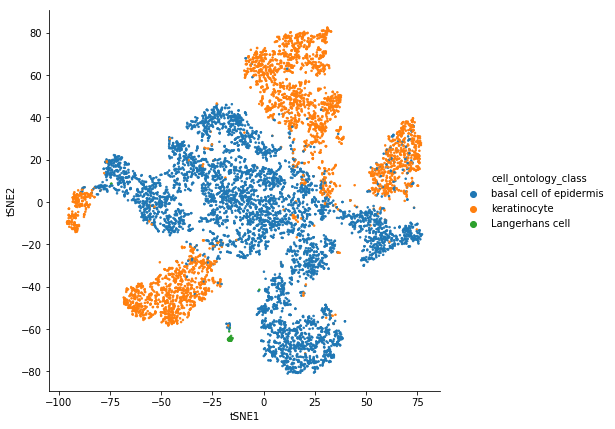

In [13]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Tongue/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


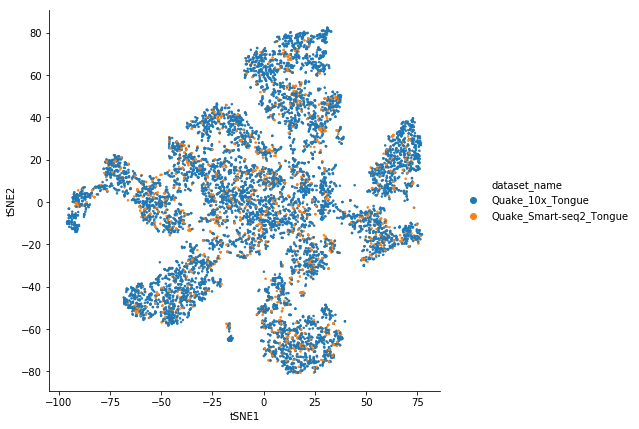

In [14]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Tongue/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


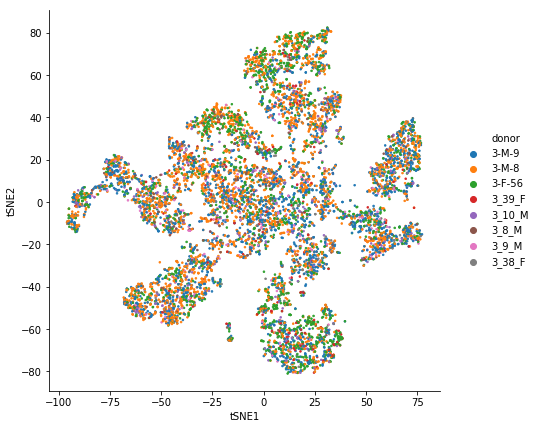

In [15]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Tongue/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


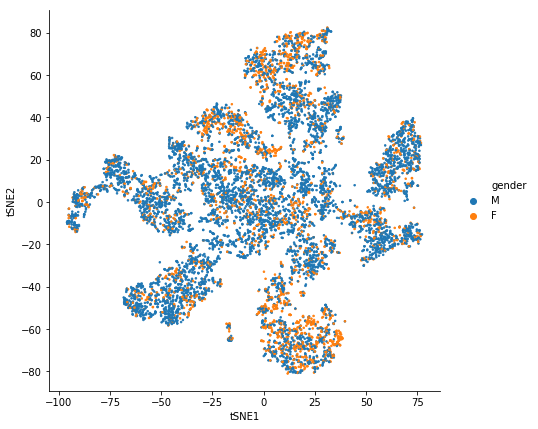

In [16]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Tongue/gender.pdf", bbox_inches="tight")

In [17]:
%%capture capio
mouse_models = [mouse_model]
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Tongue/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Tongue")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Tongue/model_1/checkpoint-157
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Tongue/model_2/checkpoint-123
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Tongue/model_3/checkpoint-136


In [18]:
with open("ALIGNED_Mus_musculus_Tongue/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Tongue/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [19]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Tongue")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9941
Accuracy = 0.9755
